## Author- Zashank Khare

### The Spark Foundtion
#### Domain : Data Science & Business Analytics Tasks
#### Task6 : Prediction using Decision Tree Algorithm

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

### Loading Datasets

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
printmd("**Displaying first five records of df**")
df.head()

**Displaying first five records of df**

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
printmd("**Displaying last five records of df**")
df.tail()

**Displaying last five records of df**

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
printmd("**Shape of df:**")
df.shape

**Shape of df:**

(150, 6)

Dataset consists of **150** rows and **6** columns.

In [6]:
printmd("**Descriptive Statistics:**")
df.describe()

**Descriptive Statistics:**

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
printmd("**Checking for null values:**")
df.isnull().sum()     

**Checking for null values:**

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

As can be seen there are no null values present in the data

In [8]:
printmd("**Checking for duplicate values:**")
df.duplicated().sum()     

**Checking for duplicate values:**

0

There are no duplicates records present in the data

In [9]:
printmd('Unique elements present in Species are: **{}**'.format(df['Species'].unique()))

Unique elements present in Species are: **['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']**

### Encoding the Target variable 

#### Coding for Species

'Iris-setosa': 0

'Iris-versicolor': 1

'Iris-virginica': 2

In [10]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df['Species'] = Encoder.fit_transform(df['Species'])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [11]:
df['Species'].unique()

array([0, 1, 2])

### Splitting the data into X & y

In [12]:
X = df.drop(['Id','Species'], axis = 1)
y = df['Species']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

### Model and Fit

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 100)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=100)

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred

array([2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2,
       2])

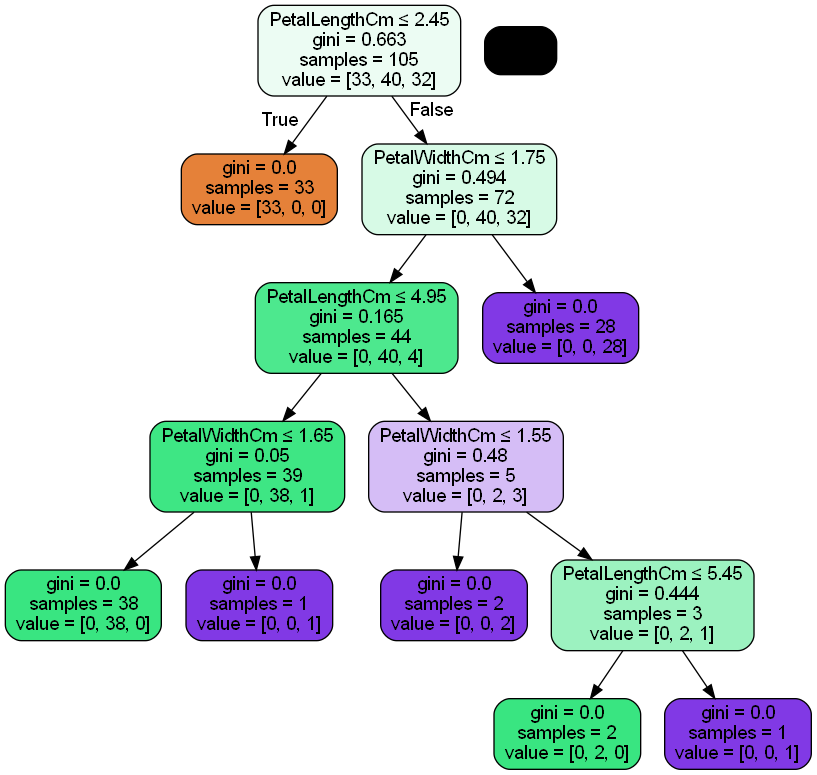

In [17]:
# Import necessary libraries for graph viz
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
# import pydot

# Visualize the graph
dot_data = StringIO()
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
export_graphviz(model, out_file=dot_data, feature_names=feature_names,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [18]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [19]:
printmd("**Accuracy Score of test data:**")
round(accuracy_score(y_test,y_pred)*100.0,2)

**Accuracy Score of test data:**

97.78

### Inputting values manually for generating Output

In [20]:
model.predict(np.array([7.9,4.4,6.9,2.5]).reshape(1,-1))

array([2])

As can be seen, after giving the input into the model, its predicting **Iris-virginica**.

## Thanks & Happy Learning